Hyperparameter tuning

In [6]:
from CBF.cbf_recommender import cbf_recommender
from utils.evaluator.evaluator import evaluator
from utils.submission_helper import submission_helper
from utils.data_manager.data_manager import data_manager
from utils.data_manager.splitter import splitter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Now I'm trying to discover the best similarity heuristic and also if there is a dependency on the k parameter

In [7]:
training, validation, test = splitter().get_train_evaluation_test(percentage_of_training_data=0.6,
                                                                  percentage_of_validation_data=0.2)

In [3]:
k = [100, 250, 400]
similarities = ['pearson', 'cosine', 'adjusted', 'asymmetric', 'jaccard', 'tanimoto',
                             'dice', 'tversky']
map_vectors = []
for chosen_k in k:
    map_vector = []
    for chosen_similarity in similarities:
        recommender = cbf_recommender()
        recommender.fit(training, k=chosen_k, normalize=True, similarity=chosen_similarity)
        map_vector.append(evaluator.evaluate_already_trained(recommender=recommender)[2])
    map_vectors.append(map_vector)
index = 0
for vector in map_vectors:
    print("k: ", k[index], "map: ", vector, "similarities: ", similarities)
    index+=1

Similarity column 25975 ( 100 % ), 1190.54 column/sec, elapsed time 0.36 min
Similarity column 25975 ( 100 % ), 1349.54 column/sec, elapsed time 0.32 min
Similarity column 25975 ( 100 % ), 1259.20 column/sec, elapsed time 0.34 min
Similarity column 25975 ( 100 % ), 1344.53 column/sec, elapsed time 0.32 min
Similarity column 25975 ( 100 % ), 1193.81 column/sec, elapsed time 0.36 min
Similarity column 25975 ( 100 % ), 1086.71 column/sec, elapsed time 0.40 min
Similarity column 25975 ( 100 % ), 1319.21 column/sec, elapsed time 0.33 min
Similarity column 25975 ( 100 % ), 948.61 column/sec, elapsed time 0.46 min
Similarity column 25975 ( 100 % ), 1273.36 column/sec, elapsed time 0.34 min
Similarity column 25975 ( 100 % ), 1118.93 column/sec, elapsed time 0.39 min
Similarity column 25975 ( 100 % ), 947.72 column/sec, elapsed time 0.46 min
Similarity column 25975 ( 100 % ), 1237.85 column/sec, elapsed time 0.35 min
Similarity column 25975 ( 100 % ), 1113.37 column/sec, elapsed time 0.39 min
S

In [5]:
k_tested = [i for i in range(30,400,30)]
k1 = [i for i in range(450, 700, 60)]
k_tested = k_tested + k1
map_=[]
for k in k_tested:
    recommender = cbf_recommender()
    recommender.fit(training, k=k, normalize=True, similarity='jaccard')
    map_.append(evaluator.evaluate_already_trained(recommender=recommender)[2])
plt.plot(k_tested, map_)
plt.ylabel('MAP')
plt.xlabel('K')
plt.show()

KeyboardInterrupt: 

In [5]:
k = k_tested[np.argmax(map_)]
k

90

In [6]:
recommender_to_test = cbf_recommender()
recommender_to_test.fit(training_set=data_manager().get_urm(), k=90, shrink=100)
submission_helper(recommender=recommender_to_test, name_of_the_file="first_cbf").build_submission()

Similarity column 25975 ( 100 % ), 935.01 column/sec, elapsed time 0.46 min


Similarity column 25975 ( 100 % ), 1215.62 column/sec, elapsed time 0.36 min
Similarity column 25975 ( 100 % ), 1182.92 column/sec, elapsed time 0.37 min
Similarity column 25975 ( 100 % ), 1092.03 column/sec, elapsed time 0.40 min
Similarity column 25975 ( 100 % ), 1094.98 column/sec, elapsed time 0.40 min
Similarity column 25975 ( 100 % ), 1110.56 column/sec, elapsed time 0.39 min
Similarity column 25975 ( 100 % ), 1065.33 column/sec, elapsed time 0.41 min
Similarity column 25975 ( 100 % ), 1095.01 column/sec, elapsed time 0.40 min
Similarity column 25975 ( 100 % ), 1016.86 column/sec, elapsed time 0.43 min
Similarity column 25975 ( 100 % ), 976.90 column/sec, elapsed time 0.44 min
Similarity column 25975 ( 100 % ), 1026.31 column/sec, elapsed time 0.42 min
Similarity column 25975 ( 100 % ), 917.86 column/sec, elapsed time 0.47 min
Similarity column 25975 ( 100 % ), 997.01 column/sec, elapsed time 0.43 min
Similarity column 25975 ( 100 % ), 1041.68 column/sec, elapsed time 0.42 min
Si

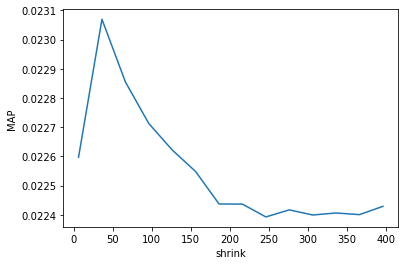

In [8]:
shrinks = [i for i in range(6,400, 30)]
map_=[]
for s in shrinks:
    recommender = cbf_recommender()
    recommender.fit(training, k=90, shrink=s, normalize=True, similarity='jaccard')
    map_.append(evaluator.evaluate_already_trained(recommender=recommender)[2])
plt.plot(shrinks, map_)
plt.ylabel('MAP')
plt.xlabel('shrink')
plt.show()

In [9]:
shrink = shrinks[np.argmax(map_)]
shrink


36

Similarity column 25975 ( 100 % ), 894.84 column/sec, elapsed time 0.48 min
Similarity column 25975 ( 100 % ), 1155.37 column/sec, elapsed time 0.37 min
Similarity column 25975 ( 100 % ), 1101.89 column/sec, elapsed time 0.39 min
Similarity column 25975 ( 100 % ), 1096.02 column/sec, elapsed time 0.39 min
Similarity column 25975 ( 100 % ), 926.45 column/sec, elapsed time 0.47 min
Similarity column 25975 ( 100 % ), 971.28 column/sec, elapsed time 0.45 min
Similarity column 25975 ( 100 % ), 1033.51 column/sec, elapsed time 0.42 min
Similarity column 25975 ( 100 % ), 1002.24 column/sec, elapsed time 0.43 min
Similarity column 25975 ( 100 % ), 990.57 column/sec, elapsed time 0.44 min
Similarity column 25975 ( 100 % ), 977.87 column/sec, elapsed time 0.44 min


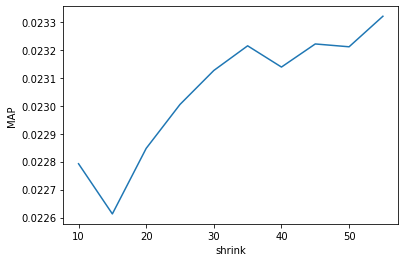

In [10]:
shrinks = [i for i in range(10,60, 5)]
map_=[]
for s in shrinks:
    recommender = cbf_recommender()
    recommender.fit(training, k=90, shrink=s, normalize=True, similarity='jaccard')
    map_.append(evaluator.evaluate_already_trained(recommender=recommender)[2])
plt.plot(shrinks, map_)
plt.ylabel('MAP')
plt.xlabel('shrink')
plt.show()

In [12]:
shrink = shrinks[np.argmax(map_)]
shrink

55

In [13]:
recommender_to_test = cbf_recommender()
recommender_to_test.fit(training_set=data_manager().get_urm(), k=90, shrink=60)
submission_helper(recommender=recommender_to_test, name_of_the_file="second_cbf").build_submission()


Similarity column 25975 ( 100 % ), 1114.79 column/sec, elapsed time 0.39 min
